In [1]:
# import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
df = pd.read_csv("water_potability.csv")

In [5]:
# Display dataset information
print("Dataset Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB

First 5 rows:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236

In [6]:
# Handle missing values by filling with mean
df.fillna(df.mean(), inplace=True)

In [7]:
# Splitting dataset into features and labels
X = df.drop(columns=["Potability"])
y = df["Potability"]

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from tensorflow import keras
from tensorflow.keras.layers import Input

# Define the neural network with L2 Regularization and Dropout
model = Sequential([
    Input(shape=(X_train.shape[1],)), # Define input shape here
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [19]:
# Compile the model using SGD optimizer
model.compile(optimizer=SGD(learning_rate=0.005, momentum=0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [21]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5967 - loss: 1.6664 - val_accuracy: 0.6113 - val_loss: 1.5413
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6154 - loss: 1.5138 - val_accuracy: 0.6159 - val_loss: 1.4015
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6212 - loss: 1.3710 - val_accuracy: 0.6235 - val_loss: 1.2851
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6238 - loss: 1.2594 - val_accuracy: 0.6265 - val_loss: 1.1869
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6402 - loss: 1.1587 - val_accuracy: 0.6341 - val_loss: 1.1047
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6153 - loss: 1.0945 - val_accuracy: 0.6341 - val_loss: 1.0327
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6371 - loss: 1.0182 - val_accuracy: 0.6357 - val_loss: 0.9735
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6403 - loss: 0.9605 - val_accuracy: 0.6402 - val_loss:

In [25]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6832 - loss: 0.6480
Test Accuracy: 0.6799


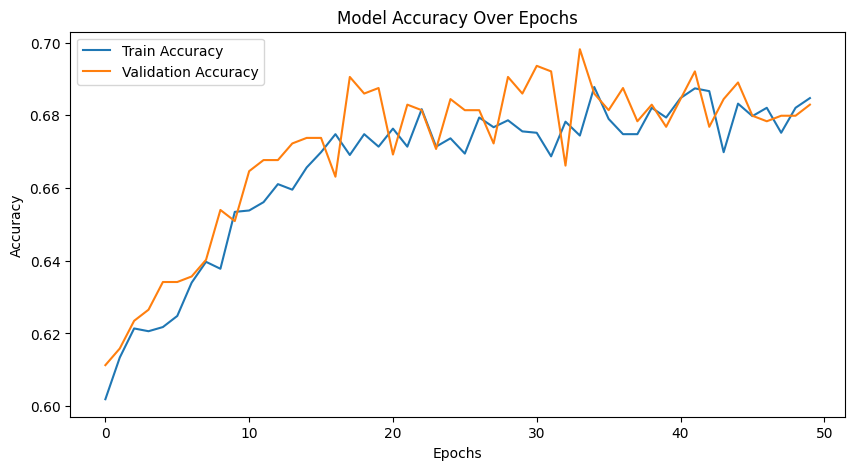

In [24]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

# Training Summary Table

In [26]:
import pandas as pd

summary_data = {
    "Parameter": ["Regularizer", "Optimizer", "Early Stopping", "Dropout Rate", "Learning Rate"],
    "Value": ["L2 (lambda=0.01)", "Stochastic Gradient Descent (SGD)", "Monitor val_loss, patience=5", "0.3", "0.01"]
}

summary_table = pd.DataFrame(summary_data)

# Display the table
from IPython.display import display
display(summary_table)


,Parameter,Value
0,Regularizer,L2 (lambda=0.01)
1,Optimizer,Stochastic Gradient Descent (SGD)
2,Early Stopping,"Monitor val_loss, patience=5"
3,Dropout Rate,0.3
4,Learning Rate,0.01
